This notebook contains code to reproduce the schematic analysis/figure

## Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

from sherlock_helpers.constants import DATA_DIR, FIG_DIR, RAW_DIR
from sherlock_helpers.functions import (
    get_topic_words, 
    get_video_text, 
    multicol_display,
    show_source
)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Helper functions and variables used across multiple notebooks can be found in `/mnt/code/sherlock_helpers/sherlock_helpers`, or on GitHub, [here](https://github.com/ContextLab/sherlock-topic-model-paper/tree/master/code/sherlock_helpers).<br />You can also view source code directly from the notebook with:<br /><pre>    from sherlock_helpers.functions import show_source<br />    show_source(foo)</pre>

## Inspect some functions

In [2]:
show_source(get_video_text)

In [3]:
show_source(get_topic_words)

## Set plotting params

In [4]:
mpl.rcParams['pdf.fonttype'] = 42
sns.set_context('poster')
palette = [sns.color_palette()[0], sns.color_palette('bright')[2]]

## Load data

In [5]:
video_text = pd.read_excel(RAW_DIR.joinpath('Sherlock_Segments_1000_NN_2017.xlsx'))
recall_text = np.load(DATA_DIR.joinpath('recall_text.npy'))

video_model, recall_models = np.load(DATA_DIR.joinpath('models_t100_v50_r10.npy'), 
                                     allow_pickle=True)

cv = np.load(DATA_DIR.joinpath('count_vectorizer_model.npy'), allow_pickle=True).item()
lda = np.load(DATA_DIR.joinpath('topic_model.npy'), allow_pickle=True).item()

## Split video and recall into thirds

In [6]:
p17_recall_model = recall_models[16]
p17_vr_corrmat = 1 - cdist(video_model, p17_recall_model, 'correlation')

video_thirds = np.linspace(0, video_model.shape[0], 4).astype(int)
recall_thirds = np.linspace(0, p17_recall_model.shape[0], 4).astype(int)

video_first = np.arange(video_thirds[0], video_thirds[1])
video_second = np.arange(video_thirds[1], video_thirds[2])
video_third = np.arange(video_thirds[2], video_thirds[3])

recall_first = np.arange(recall_thirds[0], recall_thirds[1])
recall_second = np.arange(recall_thirds[1], recall_thirds[2])
recall_third = np.arange(recall_thirds[2], recall_thirds[3])

## Find best matching timepoints from each third

In [7]:
corrmat_first = p17_vr_corrmat[np.ix_(video_first, recall_first)]
corrmat_second = p17_vr_corrmat[np.ix_(video_second, recall_second)]
corrmat_third = p17_vr_corrmat[np.ix_(video_third, recall_third)]

video_tpt1, recall_tpt1 = np.unravel_index(corrmat_first.argmax(), corrmat_first.shape)

video_tpt2, recall_tpt2 = np.unravel_index(corrmat_second.argmax(), corrmat_second.shape)
video_tpt2 += video_thirds[1]
recall_tpt2 += recall_thirds[1]

video_tpt3, recall_tpt3 = np.unravel_index(corrmat_third.argmax(), corrmat_third.shape)
video_tpt3 += video_thirds[2]
recall_tpt3 += recall_thirds[2]

## Get matching video and recall text

In [8]:
video_chunk1 = get_video_text(video_tpt1 - 24, video_tpt1 + 25)
recall_chunk1 = recall_text[recall_tpt1]

video_chunk2 = get_video_text(video_tpt2 - 24, video_tpt2 + 25)
recall_chunk2 = recall_text[recall_tpt2]

video_chunk3 = get_video_text(video_tpt3 - 24, video_tpt3 + 25)
recall_chunk3 = recall_text[recall_tpt3]

In [9]:
print(video_chunk1)

Reporter 1  raises his hand and asks Lestrade: "Detective Inspector, how can suicides be linked?"  Lestrade answers: "Well, they all took the same poison; um, they were all found in places they had no reason to be; none of them had shown any prior indication of…" Reporter 1 interrupts and states: "But you can't have serial suicides." Lestrade replies: "Well, apparently you can." Reporter 2 asks: "These three people, there's nothing that links them?" Lestrade answers: "There's no link been found yet, but we're looking for it. There has to be one." Everyone's phones trill a text message alert at the same time. The reporters all check their phones.  Lestrade and Donovan each look down at their phones As the reporters look at their phones, each message reads: Wrong!There are cameramen at the back of the room as well.  Donovan looks down at her phone.  A closer look at the phone in Donovan's hands which also shows a text message that says: "Wrong!" Donovan looks up from her phone and says: 

In [10]:
print(recall_chunk1)

 well we get this press conference before that we get this press conference with the head of the police saying like we think oh no no we did get the third murder before the press conference  it was a woman i dont remember at the time who she was but    ok maybe ill go back to that  so then we get the press conference and the guy saying that he thinks that these suicides are linked and then a reporter says but how could suicides be linked that doesnt make any sense  and then the head detect the head of the sergeant or whatever says something like i dont know but were investigating it  then everyone in the room gets a text saying wrong and everyone kind of confused about it and he said the woman beside him said if you just got a text please ignore it  and then everyone asking more questions and then the sergeant says something that apparently sherlock holmes thinks is wrong because they all get a text saying it wrong again  so then i believe that when we go to a scene of watson walking t

In [11]:
print(video_chunk2)

Sherlock closely inspects the delivate gold bracelet on her left wrist: clean Sherlock leans a little closer to see her gold earring attached to her left ear: clean Sherlock also takes a look at the gold chain around her neck: clean Sherlock puts his magnifying glass closer toward the victim's left hand to look at her rings.  A view of the wedding ring and engagement ring flag a different message to Sherlock: dirty Sherlock blinks as a rapid succession of conclusions appear in front of his eyes Back to a view of the rings. The conclusions Sherlock draw are: married, unhappily married, unhappily married 10+ years John is keenly watching. He tilts his head left and right, wondering what Sherlock is doing.  Carefully Sherlock works the wedding ring off the woman's finger and holds it up to look at the inside of the ring.  While the outside of the ring is still showing dirty, the inside registers as, clean As Sherlock lowers the ring and slides it back onto the woman's finger, he has alrea

In [12]:
print(recall_chunk2)

 it a wood floor  sherlock kinda notices that all her her painted pink nails are very messed up on her left hand so he looks and by her hand it says rache is spelled out as if she had scratched it on the floor  he think that well first there all these words on the screen saying it a german noun meaning revenge but then he says no it probably cause he just had just learned that her name was rachel wilson cause that what the sergeant had said  so then he deduces all these things like he feels her back of her suit and notices that it wet and it also very wet underneath her collar  but her umbrella is dry  and then he notices that he looks at all her jewelry and he has this little device that tells him if something is clean or dirty  and all of her jewelry like necklace her bracelet theyre all clean except for her wedding ring which the inside is clean but the outside dirty which he then think that that means she serial adulteress  because she always taking it off  but he thinks that someo

In [13]:
print(video_chunk3)

Later, John opens the door to his bedsit, walks in, switches on the light, and closes the door behind him.  John walks toward his desk, looking around to his right.  John opens his desk drawer.  John takes out his pistol from the drawer. John checks the clip of the gun.  John tucks the gun into the back of his waistband of his jeans and turns to leave again.  Later, the car pulls up outside of 221B Baker Street.  Inside the car, Anthea is still fixated on her phone. John looks across the her and says: "Listen, your boss - any chance you could not tell him this is where I went?" Anthea nonchalantly says: "Sure." John: "You've told him already, haven't you?" Anthea smiles across to him briefly then says: "Yeah." John nods in resignation.  John turns to get out of the car, but just as he opens the door, he turns back to her and asks: "Hey, um… do you ever get any free time?" Anthea smiles while typing on her phone, and sarcastically says: "Oh yeah, lots." John smiles and looks at her, wai

In [14]:
print(recall_chunk3)

 that i offered you money to spy on him basically  ok so then theyre in the car  he gets out of the car  or before he gets out of the car he says to the woman who now seated on the left hand side do you have any time free time  and she kinda smirks and says no does it seem like i have free time she always on her phone  so then he gets out and is back at 221 baker street b baker street and goes up in the room  and then that when we see ok yeah so he enters the room sherlock is just lying on the couch with three nicotine patches on his left arm  he thinking yeah he just been thinking  so then watson goes up to him and asks him what oh i forgot to mention this  because while he was talking to moriarty im assuming that the man name cause he hadnt introduced himself


## Get video & recall topic weights for video's hightest weighted topic at each timepoint

In [15]:
video_tpts = [video_tpt1, video_tpt2, video_tpt3]
recall_tpts = [recall_tpt1, recall_tpt2, recall_tpt3]

topics = [video_model[tpt].argmax() for tpt in video_tpts]

In [16]:
df = pd.DataFrame(index=range(18), 
                  columns=['Time', 'Topic', 'Model', 'Topic weight'])

row_ix = 0
for vid_tpt, rec_tpt in zip(video_tpts, recall_tpts):
    tr_tpt = f'TR {vid_tpt}'
    for topic in topics:
        topic_weight_vid = video_model[vid_tpt, topic]
        topic_weight_rec = p17_recall_model[rec_tpt, topic]
        df.loc[row_ix] = [tr_tpt, str(topic), 'Video', topic_weight_vid]
        df.loc[row_ix + 1] = [tr_tpt, str(topic), 'Recall', topic_weight_rec]
        row_ix += 2

In [17]:
df

,Time,Topic,Model,Topic weight
0,TR 265,65,Video,0.917293
1,TR 265,65,Recall,0.490501
2,TR 265,9,Video,9.99573e-06
3,TR 265,9,Recall,0.036392
4,TR 265,68,Video,9.99573e-06
5,TR 265,68,Recall,0.000126582
6,TR 1081,65,Video,9.15948e-06
7,TR 1081,65,Recall,0.000136986
8,TR 1081,9,Video,0.854667
9,TR 1081,9,Recall,0.56455


## Plot result

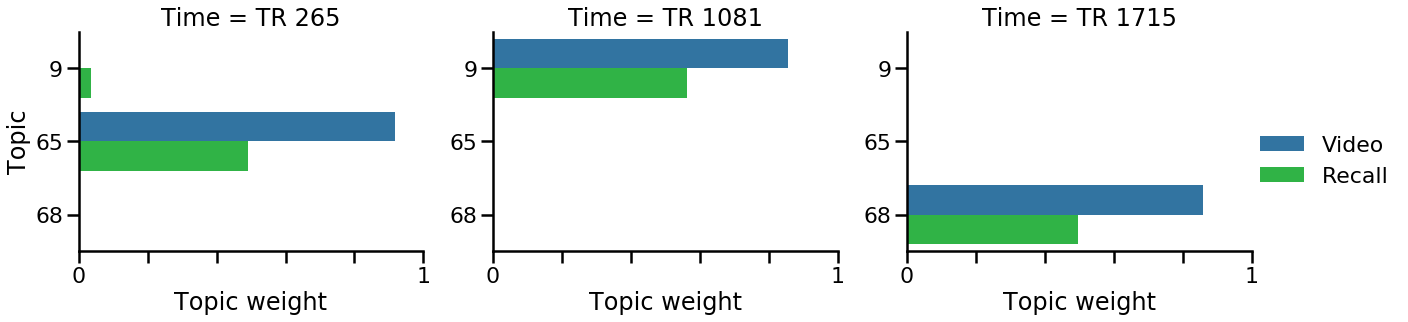

In [18]:
g = sns.catplot(x='Topic weight', 
                y='Topic', 
                data=df, 
                hue='Model', 
                col='Time', 
                kind='bar', 
                orient='h', 
                aspect=1.2, 
                order=['9', '65', '68'], 
                hue_order=['Video', 'Recall'], 
                palette=palette, 
                sharey=False)

g.fig.legends[0].set_title('')

for ax in g.axes[0]:
    ax.set_xlim(0,1)
    ax.set_xticklabels(['0', '', '', '', '', '1'])
        
# plt.savefig('/mnt/paper/figs/tmp/schematic_topic_weights.pdf')

## Get words with highest weights in each topic

In [19]:
topic_words = get_topic_words(cv, lda, topics=topics, n_words=10)

multicol_display(*map('\n'.join, topic_words.values()), 
                 ncols=3, 
                 col_headers=(f'Topic {t}' for t in topic_words.keys()),
                 table_css={'width': '50%'},
                 cell_css={'line-height': '2.5em'})

lestradedonovanindoorroompressconferencepolicereportermediumreporters,sherlockfloorroomcrimescenelauristonindoorgardensjohnyes,johnmediumantheayesindoorstreetbakersherlockoutdoorman
